# Lista 8 (10 pkt.)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy
import random

## Zadanie 1 (2 pkt.)

Napisz funkcję $gen(a,b,p)$, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [2]:
def gen(a,b,p):
    points = []
    perf_square = dict()
    for i in range(0,p):
        j=(i**2)%p
        perf_square[i] = j
    for i in range(0, p):
        test = pow(i,3) + (a*i) + (b)
        test = test%p
        if test in perf_square.values():
            sq = list(perf_square.keys())[list(perf_square.values()).index(test)]
            points.append([i, sq])
            if(sq!=0):
                points.append([i, p-sq])
    return points  

In [3]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję $add(P,Q,a,p)$, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję $inv$ z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako $nan$, tj. za pomocą $float('nan')$, do sprawdzania czy coś jest $nan$ użyj $np.isnan()$.

In [4]:
#zestaw 7
def inv(p,n):
    x = 1
    y = 0
    r = 0
    s = 1
    
    while n > 0:
        q = p//n
        c = p%n
        p = n
        n = c
        temp_r = r
        temp_s = s
        r = x - q * r
        s = y - q * s
        x = temp_r
        y = temp_s
    return x

In [5]:
def add(P,Q,a,p):
    if(np.isnan(P[0]) or np.isnan(P[1])):
        return Q
    if(np.isnan(Q[0]) or np.isnan(Q[1])):
        return P
    if P[0] == Q[0]:
        if (P == [Q[0], (-Q[1]) % p]):
            return [float('nan'), float('nan')]
        else:
            inv_ = inv(2*P[1],p)
            s = (3*pow(P[0],2)+a)*inv_
    else:
        inv_ = inv(Q[0]-P[0],p)
        s = (Q[1]-P[1])*inv_
    x3 = (s**2-Q[0]-P[0])%p
    y3 = ((s*(Q[0]-x3)-Q[1]))%p
    return [x3,y3]

In [6]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


W oparciu o poprzednią funkcję napisz funkcję $multiply(n,P,a,p)$, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [7]:
def double(P,a,p):
    if(np.isnan(P[0]) or np.isnan(P[1])):
        return [float('nan'),float('nan')]
    else:
        return add(P,P,a,p)
def multiply(n,P,a,p):
    result = [float('nan'),float('nan')]
    add_ = P
    while n:
        if n%2:
            result = add(result, add_, a,p)
        add_ = double(add_,a,p)
        n = n//2
    return result

In [8]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty ($plt.scatter()$) reprezentujące krzywą eliptyczną. Stosując funkjcę $multiply()$ przeanalizuj jaką grupę generuje kazdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3-5x$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="fig.png" width="500"/>

Punkt $P_0$ generuje dwuelementową grupę:

{$P_0,\mathcal{O}$},

bo $2P_0=\mathcal{O}$,

punkt $P_1$ generuje pięcioelementową grupę:

{$P_1,P_3,P_4,P_2,\mathcal{O}$}

bo $2P_1=P_3,3P_1=P_4,4P_1=P_2,5P_1=\mathcal{O}$

pozostałe elementy $P_2,P_3,P_4$ generują dokładnie tą samą grupę, zatem na tej krzywej mamy określone dwie grupy jedną dwuelementową i jedną pięcioelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3-2x+1$

Krzywa: a = -5, b = 0, p = 5
Punkty: [[0, 0], [1, 1], [1, 4], [4, 2], [4, 3]]
---------------------------------------------------
2P0 =  [nan, nan] = O
P0 generuje grupę: {P0, O}
---------------------------------------------------
2P1 =  [4, 2] = P3
3P1 =  [4, 3] = P4
4P1 =  [1, 4] = P2
5P1 =  [nan, nan] = O
P1 generuje grupę: {P1,P3,P4,P2,O}
---------------------------------------------------
Dla krzywej mamy określone dwie grupy - dwuelementową i pięcioelementową


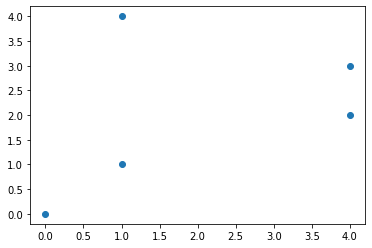

In [9]:
points = gen(-5,0,5)

print("Krzywa: a = -5, b = 0, p = 5")
print("Punkty:",points)
print("---------------------------------------------------")
print("2P0 = ", multiply(2,[0,0],-5,5), "= O")
print("P0 generuje grupę: {P0, O}")
print("---------------------------------------------------")
print("2P1 = ", multiply(2,[1,1],-5,5), "= P3")
print("3P1 = ", multiply(3,[1,1],-5,5), "= P4")
print("4P1 = ", multiply(4,[1,1],-5,5), "= P2")
print("5P1 = ", multiply(5,[1,1],-5,5), "= O")
print("P1 generuje grupę: {P1,P3,P4,P2,O}")
print("---------------------------------------------------")
print("Dla krzywej mamy określone dwie grupy - dwuelementową i pięcioelementową")
plt.scatter(*zip(*points))

Krzywa: a = -1, b = 0, p = 7
Punkty: [[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]]
---------------------------------------------------
2P0 =  [nan, nan] = O
P0 generuje grupę: {P0, O}
---------------------------------------------------
2P1 =  [nan, nan] = O
P1 generuje grupę: {P1, O}
---------------------------------------------------
2P2 =  [1, 0] = P1
3P2 =  [4, 5] = P3
4P2 =  [nan, nan] = O
P2 generuje grupę: {P2, P1, P3, O}
---------------------------------------------------
2P3 =  [1, 0] = P1
3P3 =  [4, 2] = P2
4P3 =  [nan, nan] = O
P3 generuje grupę: {P3, P1, P2, O}
---------------------------------------------------
2P4 =  [1, 0] = P1
3P4 =  [5, 6] = P5
4P4 =  [nan, nan] = O
P4 generuje grupę: {P4, P1, P5, O}
---------------------------------------------------
2P5 =  [1, 0] = P1
3P5 =  [5, 1] = P4
4P5 =  [nan, nan] = O
P5 generuje grupę: {P5, P1, P4, O}
---------------------------------------------------
2P6 =  [nan, nan] = O
P6 generuje grupę: {P6, O}
---------------

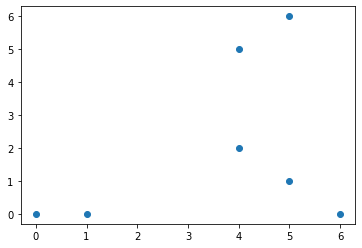

In [10]:
points = gen(-1,0,7)

print("Krzywa: a = -1, b = 0, p = 7")
print("Punkty:",points)
print("---------------------------------------------------")
print("2P0 = ", multiply(2,[0,0],-1,7), "= O")
print("P0 generuje grupę: {P0, O}")
print("---------------------------------------------------")
print("2P1 = ", multiply(2,[1,0],-1,7), "= O")
print("P1 generuje grupę: {P1, O}")
print("---------------------------------------------------")
print("2P2 = ", multiply(2,[4,2],-1,7), "= P1")
print("3P2 = ", multiply(3,[4,2],-1,7), "= P3")
print("4P2 = ", multiply(4,[4,2],-1,7), "= O")
print("P2 generuje grupę: {P2, P1, P3, O}")
print("---------------------------------------------------")
print("2P3 = ", multiply(2,[4,5],-1,7), "= P1")
print("3P3 = ", multiply(3,[4,5],-1,7), "= P2")
print("4P3 = ", multiply(4,[4,5],-1,7), "= O")
print("P3 generuje grupę: {P3, P1, P2, O}")
print("---------------------------------------------------")
print("2P4 = ", multiply(2,[5,1],-1,7), "= P1")
print("3P4 = ", multiply(3,[5,1],-1,7), "= P5")
print("4P4 = ", multiply(4,[5,1],-1,7), "= O")
print("P4 generuje grupę: {P4, P1, P5, O}")
print("---------------------------------------------------")
print("2P5 = ", multiply(2,[5,6],-1,7), "= P1")
print("3P5 = ", multiply(3,[5,6],-1,7), "= P4")
print("4P5 = ", multiply(4,[5,6],-1,7), "= O")
print("P5 generuje grupę: {P5, P1, P4, O}")
print("---------------------------------------------------")
print("2P6 = ", multiply(2,[6,0],-1,7), "= O")
print("P6 generuje grupę: {P6, O}")
print("---------------------------------------------------")
print("Dla krzywej mamy określone  grupy:")
print("{P0, O}, {P1, O}, {P6, O}, {P2, P1, P3, O}, {P4, P1, P5, O}")

plt.scatter(*zip(*points))

Krzywa: a = -2, b = 1, p = 5
Punkty: [[0, 1], [0, 4], [1, 0], [2, 0]]
---------------------------------------------------
2P0 =  [1, 0] = P2
3P0 =  [0, 4] = P1
4P0 =  [nan, nan] = O
P0 generuje grupę: {P0, P2, P1, O}
---------------------------------------------------
2P1 =  [1, 0] = P2
3P1 =  [0, 1] = P0
4P1 =  [nan, nan] = O
P1 generuje grupę: {P1, P2, P0, O}
---------------------------------------------------
2P2 =  [nan, nan] = O
P2 generuje grupę: {P2, O}
---------------------------------------------------
2P3 =  [nan, nan] = O
P3 generuje grupę: {P3, O}
---------------------------------------------------
Dla krzywej mamy określone 3 grupy:
{P2, O}, {P3, O}, {P0, P2, P1, O}


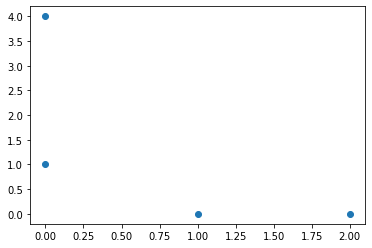

In [11]:
points = gen(-2,1,5)

print("Krzywa: a = -2, b = 1, p = 5")
print("Punkty:",points)
print("---------------------------------------------------")
print("2P0 = ", multiply(2,[0,1],-2,5), "= P2")
print("3P0 = ", multiply(3,[0,1],-2,5), "= P1")
print("4P0 = ", multiply(4,[0,1],-2,5), "= O")
print("P0 generuje grupę: {P0, P2, P1, O}")
print("---------------------------------------------------")
print("2P1 = ", multiply(2,[0,4],-2,5), "= P2")
print("3P1 = ", multiply(3,[0,4],-2,5), "= P0")
print("4P1 = ", multiply(4,[0,4],-2,5), "= O")
print("P1 generuje grupę: {P1, P2, P0, O}")
print("---------------------------------------------------")
print("2P2 = ", multiply(2,[1,0],-2,5), "= O")
print("P2 generuje grupę: {P2, O}")
print("---------------------------------------------------")
print("2P3 = ", multiply(2,[2,0],-2,5), "= O")
print("P3 generuje grupę: {P3, O}")
print("---------------------------------------------------")
print("Dla krzywej mamy określone 3 grupy:")
print("{P2, O}, {P3, O}, {P0, P2, P1, O}")

plt.scatter(*zip(*points))

## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji $gen()$, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

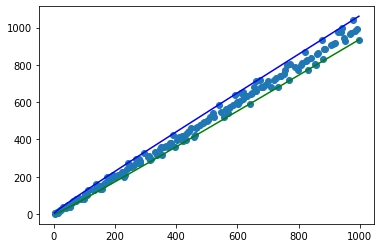

In [12]:
from sympy import primerange
prime_num_list = list(primerange(0,1000))
p_counter = []
for i in prime_num_list:
    p_counter.append([i, len(gen(-1,0,i))])

x = np.array(list(primerange(0,1000)))
y1 = x + 1 - (2*np.sqrt(x))
plt.plot(x, y1, color ="green")
y2 = x + 1 + (2*np.sqrt(x))
plt.plot(x, y2, color ="blue")

plt.scatter(*zip(*p_counter))



lub jakkolwiek inaczej.

## Zadanie 5 (2 pkt.)

Napisz funkcję $ord(G,a,p)$ znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [13]:
def ord(G,a,p):
    rank = 1
    point = G
    while not np.isnan(point).any():
        point = multiply(rank,G,a,p)
        rank+=1
    return rank-1

In [14]:
print(ord([4,4],-1,11)==3)
print(ord([8,8],-1,11)==6)
print(ord([3,2],-1,7)==3)
print(ord([3,5],-1,7)==3)
print(ord([3,2],0,5)==3)
print(ord([0,0],0,5)==2)

True
True
True
True
True
True


In [15]:
e_points = gen(-1,0,97)
p = [[0,0],0]
for i in e_points:
    rank = ord(i,-1,97)
    if rank > p[1]:
        p[0] = i
        p[1] = rank
print(p)

[[6, 4], 20]


## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$,$b$,$p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [31]:
a = -1
b = 0
G = [6,4]
p = 97

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [32]:
l = list(range(2,len(gen(-1,0,97))-1))
n=random.choice(l)
print(n)

41


Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [33]:
A=multiply(n,G,-1,97)
print(n, A)

41 [6, 4]


To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [34]:
m=random.choice(l)
B=multiply(m,G,-1,97)
print(m, B)

25 [22, 76]


Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [35]:
k_B=multiply(m,A,-1,97)
k_A=multiply(n,B,-1,97)

In [36]:
k_A==k_B

True

Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.